In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

%matplotlib inline  
sb.set_style('dark')



In [56]:
df= pd.read_csv('Employee Satisfaction Survey Data.csv')

In [57]:
df.head(30)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [58]:
df.shape


(14999, 10)

In [59]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


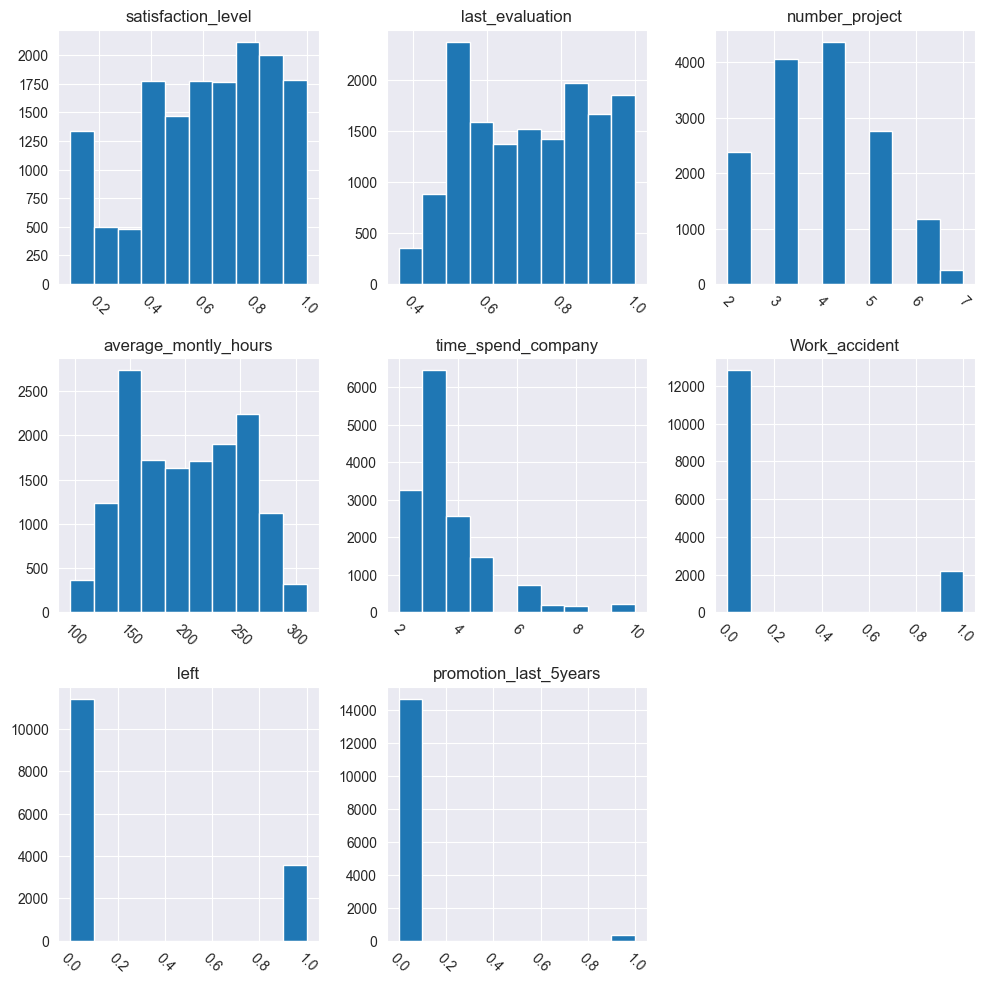

In [60]:
df.hist(figsize=(10,10),xrot=-45)
plt.tight_layout()
plt.show()

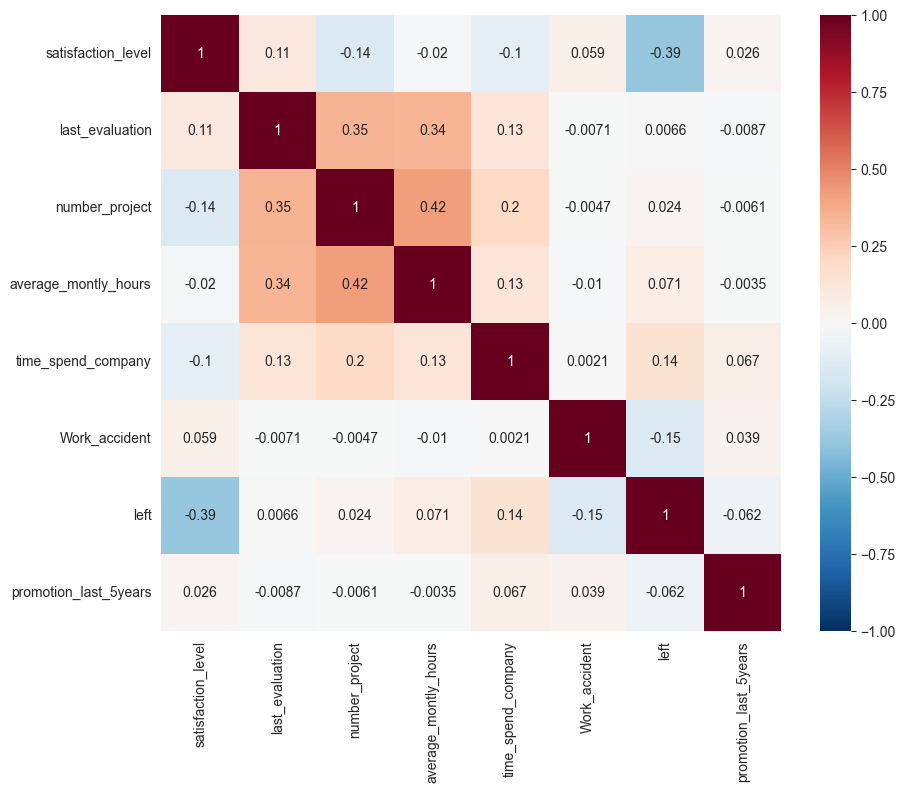

In [61]:
df_numeric = df.drop(columns=['salary', 'sales'], errors='ignore')



# Calculate correlation matrix for numeric data only
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sb.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)

plt.show()


the strongest correlation is between number_project and average_monthly_hours

In [62]:
df.describe(include=['object'])


,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


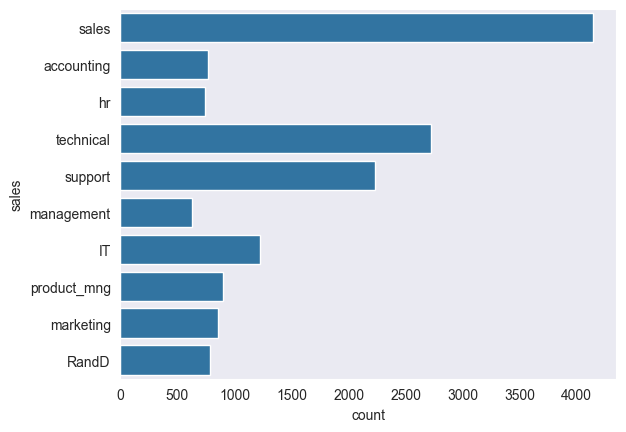

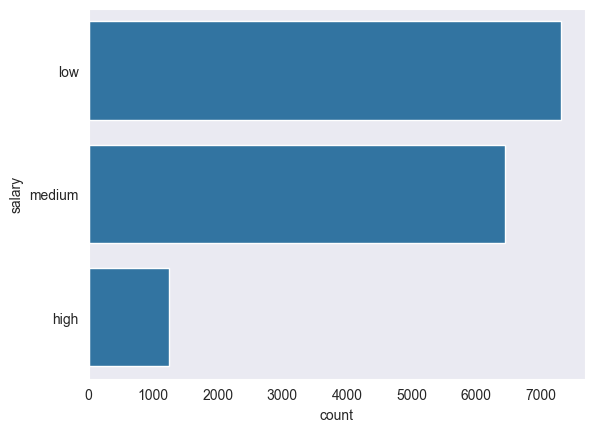

In [63]:
for feature in df.dtypes[df.dtypes=='object'].index:
    sb.countplot(y=feature,data=df)
    plt.show()

In [64]:
df.groupby('sales')['average_montly_hours'].mean()

sales
IT             202.215974
RandD          200.800508
accounting     201.162973
hr             198.684709
management     201.249206
marketing      199.385781
product_mng    199.965632
sales          200.911353
support        200.758188
technical      202.497426
Name: average_montly_hours, dtype: float64

In [65]:
value_counts = df['promotion_last_5years'].value_counts()
print(value_counts)

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64


In [66]:
value_counts = df['left'].value_counts()
print(value_counts)

left
0    11428
1     3571
Name: count, dtype: int64


In [67]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

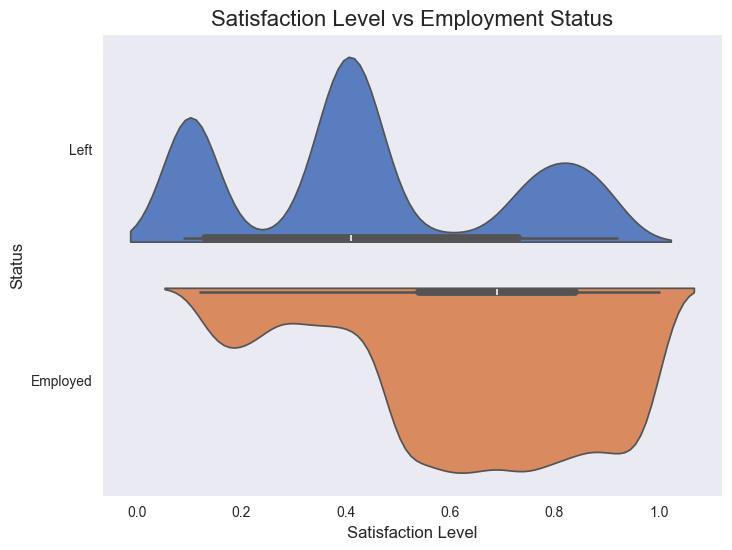

In [68]:
df['status'] = df['left'].map({0: 'Employed', 1: 'Left'})
df['status'] = df['left'].map({0: 'Employed', 1: 'Left'})


plt.figure(figsize=(8, 6))  
sb.violinplot(x='satisfaction_level', y='status', data=df, palette='muted', split=True)


plt.title('Satisfaction Level vs Employment Status', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

-Nhân viên đã rời công ty (màu xanh): Có xu hướng tập trung vào mức độ hài lòng thấp (gần 0-0.5), đồng thời có một số ít nhân viên rời đi dù mức độ hài lòng cao (gần 0.5–1.0).

-Nhân viên đang làm việc (màu cam): Tập trung ở mức độ hài lòng cao (gần 0.5–0.9), rất ít người ở mức độ hài lòng thấp.

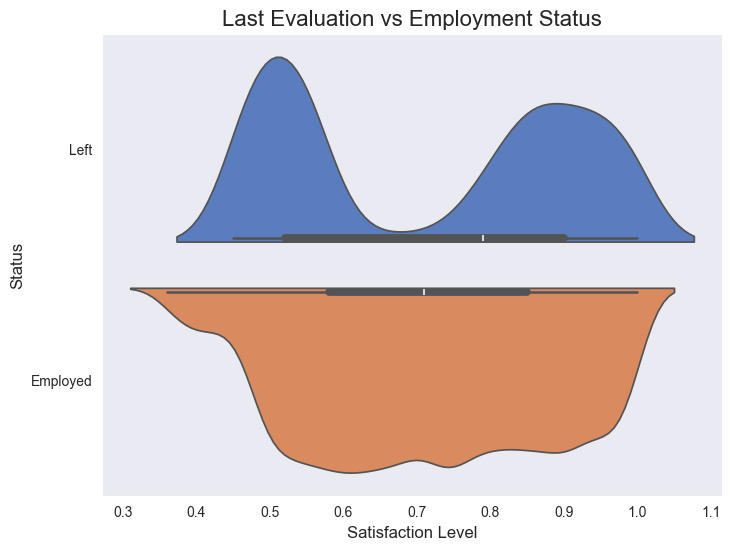

In [69]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='last_evaluation', y='status', data=df, palette='muted', split=True)


plt.title('Last Evaluation vs Employment Status', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

những nhân viên được đánh giá có hiệu suất thấp thì rời công ty 


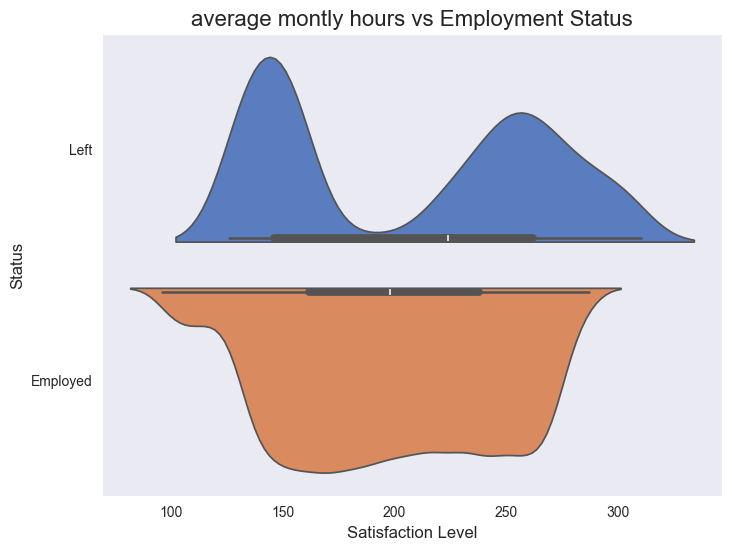

In [70]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='average_montly_hours', y='status', data=df, palette='muted', split=True)


plt.title('average montly hours vs Employment Status', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

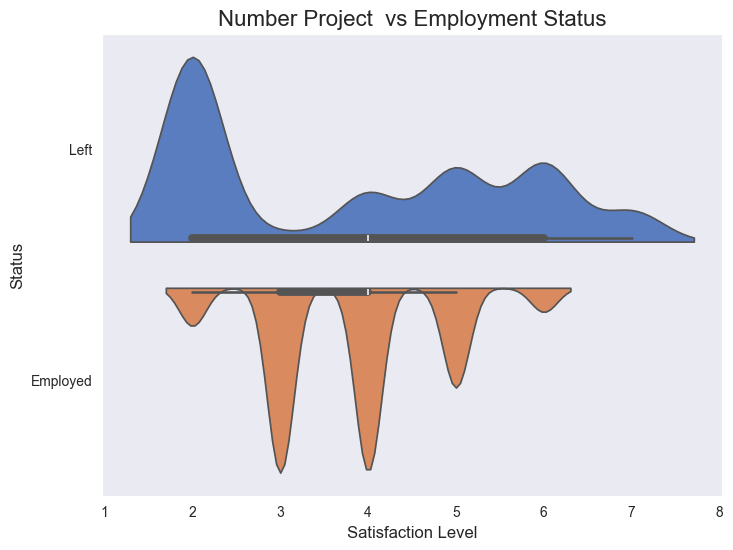

In [71]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='number_project', y='status', data=df, palette='muted', split=True)


plt.title('Number Project  vs Employment Status', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

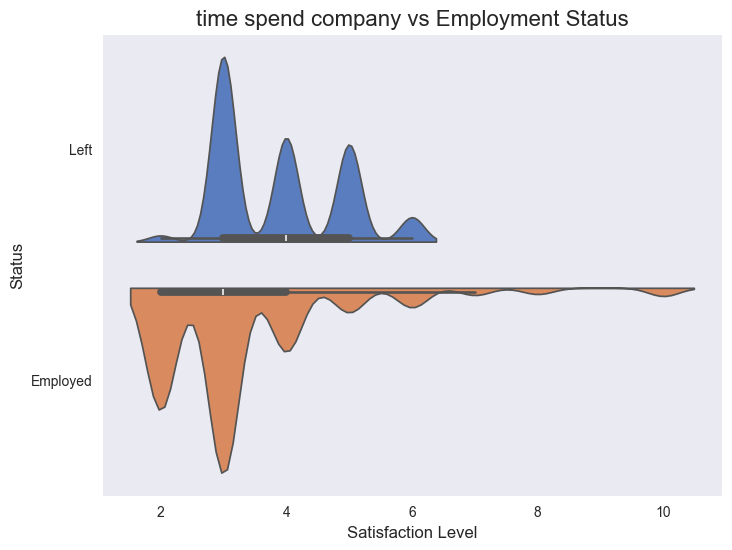

In [72]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='time_spend_company', y='status', data=df, palette='muted', split=True)


plt.title('time spend company vs Employment Status', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

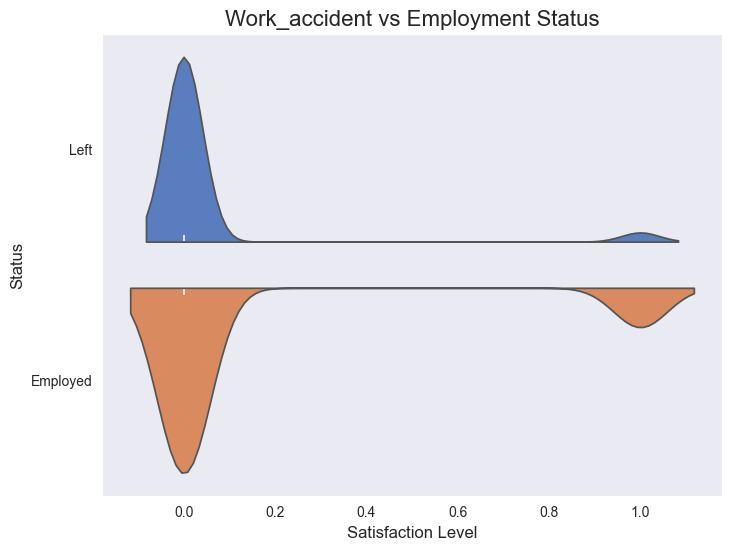

In [73]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='Work_accident', y='status', data=df, palette='muted', split=True)


plt.title('Work_accident vs Employment Status', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

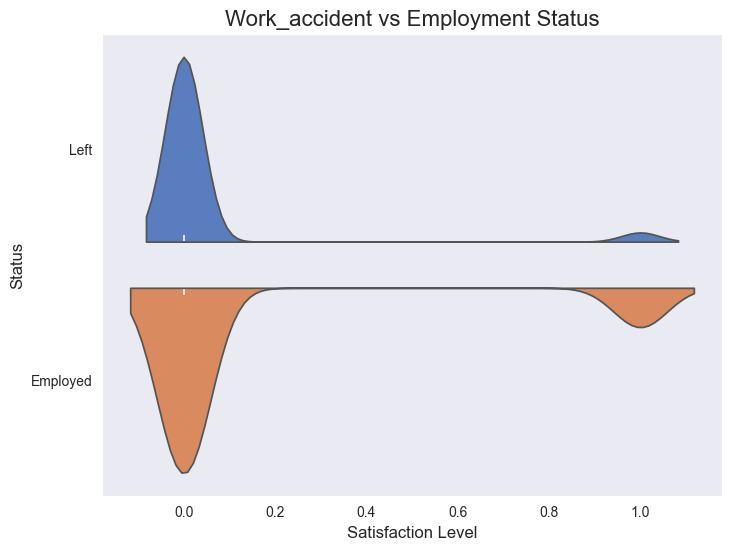

In [74]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='Work_accident', y='status', data=df, palette='muted', split=True)


plt.title('Work_accident vs Employment Status', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

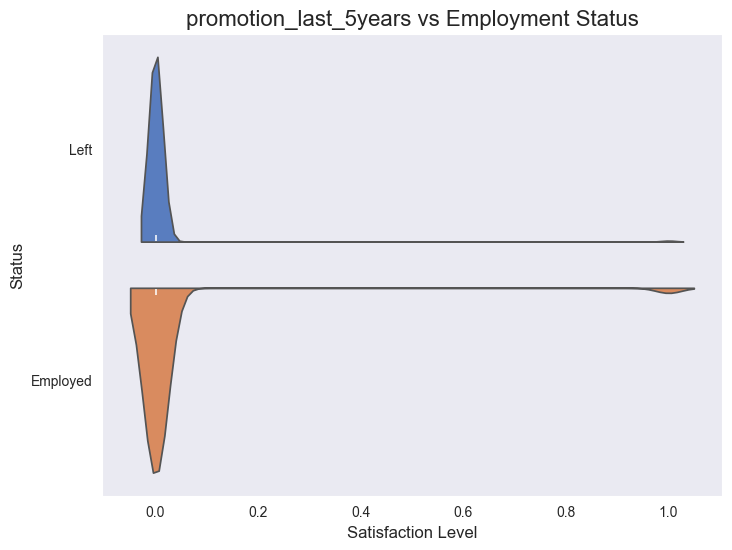

In [75]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='promotion_last_5years', y='status', data=df, palette='muted', split=True)


plt.title('promotion_last_5years vs Employment Status', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

2. Data pre-processing


drop duplicate

In [76]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(14999, 11)
(11991, 11)


missing value

In [77]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
status                   0
dtype: int64

In [78]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,status
0,0.38,0.53,2,157,3,0,1,0,sales,low,Left
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Left
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Left
3,0.72,0.87,5,223,5,0,1,0,sales,low,Left
4,0.37,0.52,2,159,3,0,1,0,sales,low,Left


### label encoding


In [79]:
df['salary_num'] = df.salary.replace({"low":0,'medium':1,'high':2})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,status,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,Left,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Left,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Left,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,Left,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,Left,0


one-hot encoding

In [80]:
df = pd.get_dummies(df,columns=['salary','sales'])

In [81]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
status                    object
salary_num                 int64
salary_high                 bool
salary_low                  bool
salary_medium               bool
sales_IT                    bool
sales_RandD                 bool
sales_accounting            bool
sales_hr                    bool
sales_management            bool
sales_marketing             bool
sales_product_mng           bool
sales_sales                 bool
sales_support               bool
sales_technical             bool
dtype: object

In [82]:
print(df.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'status', 'salary_num', 'salary_high',
       'salary_low', 'salary_medium', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing',
       'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')


In [83]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,status,salary_num,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,Left,0,False,True,False,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,Left,1,False,False,True,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,Left,1,False,False,True,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,Left,0,False,True,False,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,Left,0,False,True,False,False,False,False,False,False,False,False,True,False,False


In [84]:
bool_columns = df.select_dtypes(include=['bool']).columns

df[bool_columns] = df[bool_columns].astype(int)


In [118]:
df.drop('status', axis=1, inplace=True)


In [119]:
df.head()

### Save Analytical table

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [120]:
df.to_csv('Analytical_table.csv', index=None)

### 3. Modeling

In [121]:
df= pd.read_csv("Analytical_table.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [122]:
print(df.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')


#### Split Train and Test

In [123]:
x = df.drop('left', axis=1)  # Adjust according to the correct column name
y = df['left']


In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=492, stratify=df['left'])


In [125]:
print(len(x_train), len(x_test)), len(y_train), len(y_test)

9592 2399


(None, 9592, 2399)

#### pipelines

In [126]:
pipelines = {
    'l1': make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l1', random_state=123, solver='liblinear')
    ),
    'l2': make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l2', random_state=123)
    ),
    'rf': make_pipeline(
        StandardScaler(), 
        RandomForestClassifier(random_state=123)
    ),
    'gb': make_pipeline(
        GradientBoostingClassifier(random_state=123)
    )
}

C lớn → Ít regularization hơn → Mô hình có thể dễ dàng overfit.


C nhỏ → Regularization mạnh hơn → Mô hình ít overfit nhưng có thể underfit.

In [127]:
l1_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

l2_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

In [138]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['sqrt', 'log2', 0.33],  # Fix here: replaced 'auto' with valid options
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10],
}

In [ ]:
gb_hyperparameters = {
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}


In [140]:
hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

In [141]:
print(x_train.dtypes)  # Kiểm tra kiểu dữ liệu
print(x_train.head())  # Kiểm tra dữ liệu đầu vào


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary_high                int64
salary_low                 int64
salary_medium              int64
sales_IT                   int64
sales_RandD                int64
sales_accounting           int64
sales_hr                   int64
sales_management           int64
sales_marketing            int64
sales_product_mng          int64
sales_sales                int64
sales_support              int64
sales_technical            int64
dtype: object
      satisfaction_level  last_evaluation  number_project  \
8137                0.52             0.67               4   
1736                0.40             0.48               2   
1704                0.36             0.51               2   
8603                0.79             0.49               3   
6220                0

In [132]:
df = df.drop(columns=['salary_num'])


KeyError: "['salary_num'] not found in axis"

In [142]:
print(x_train.dtypes)  # Kiểm tra kiểu dữ liệu
print(x_train.head())  # Kiểm tra dữ liệu đầu vào

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary_high                int64
salary_low                 int64
salary_medium              int64
sales_IT                   int64
sales_RandD                int64
sales_accounting           int64
sales_hr                   int64
sales_management           int64
sales_marketing            int64
sales_product_mng          int64
sales_sales                int64
sales_support              int64
sales_technical            int64
dtype: object
      satisfaction_level  last_evaluation  number_project  \
8137                0.52             0.67               4   
1736                0.40             0.48               2   
1704                0.36             0.51               2   
8603                0.79             0.49               3   
6220                0

### Trainning : fir model with cross-validation

In [143]:
filter_model={}
for name, pipeline in pipelines.items():
    print("current fitting", name)
    
   
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
   
    model.fit(x_train, y_train)
    
    
    filter_model[name] = model
    print("Fitting for", name, "completed")

current fitting l1
Fitting for l1 completed
current fitting l2
Fitting for l2 completed
current fitting rf
Fitting for rf completed
current fitting gb
Fitting for gb completed


initial results

In [144]:
for name, model in filter_model.items():
    print(name,model.best_score_)

l1 0.8507096150503995
l2 0.8383023766075773
rf 0.984570081682308
gb 0.9844662408759124


Results for l1 

[[1981   20]
 [ 339   59]]
Accuracy score: 0.850354314297624
Precision: 0.7468354430379747
Recall: 0.14824120603015076
F1: 0.24737945492662475


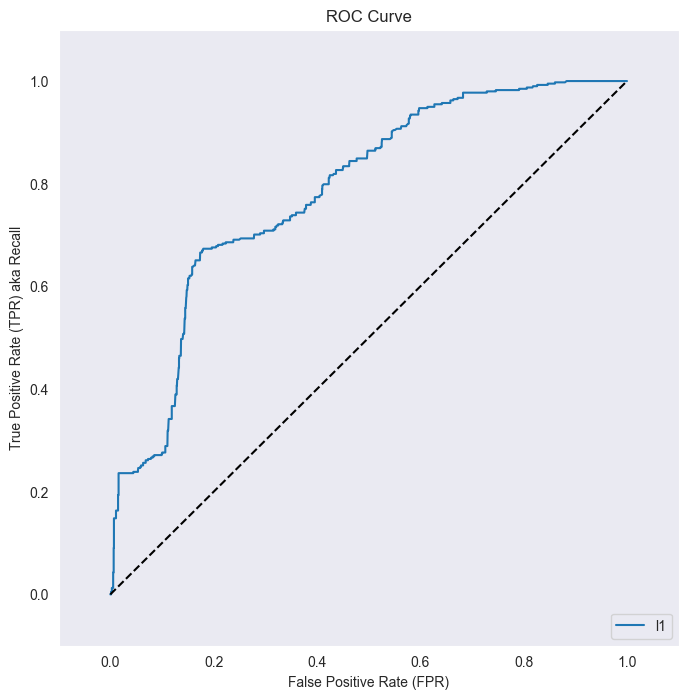

AUROC: 0.784212793100937
Results for l2 

[[1935   66]
 [ 332   66]]
Accuracy score: 0.8340975406419341
Precision: 0.5
Recall: 0.1658291457286432
F1: 0.2490566037735849


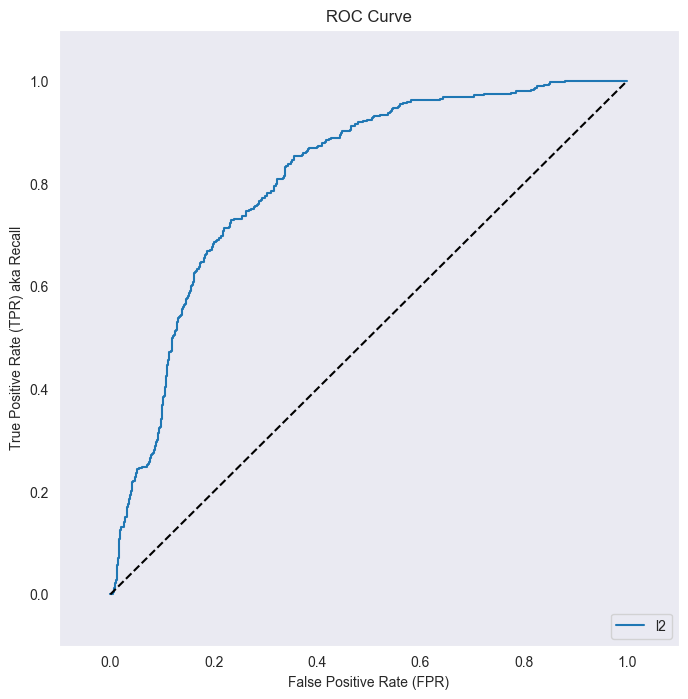

AUROC: 0.8107039445101569
Results for rf 

[[1994    7]
 [  34  364]]
Accuracy score: 0.9829095456440183
Precision: 0.9811320754716981
Recall: 0.914572864321608
F1: 0.9466840052015605


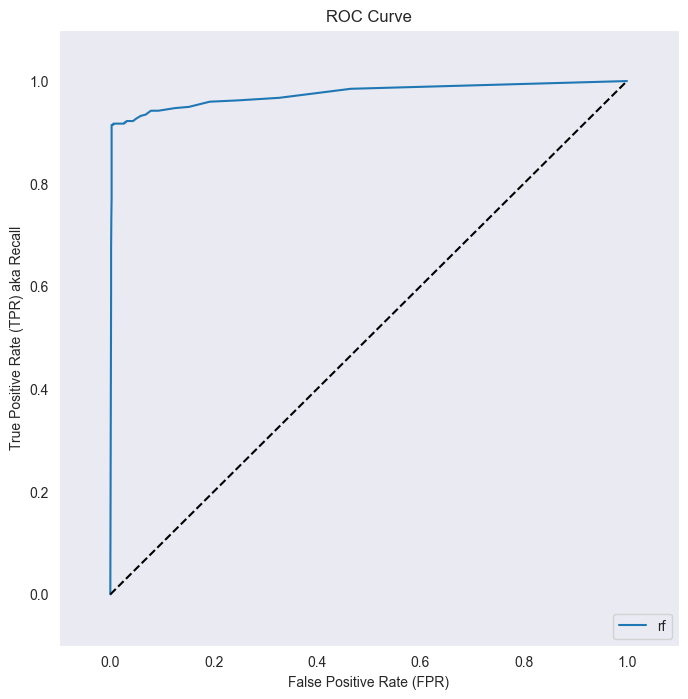

AUROC: 0.9748662101110249
Results for gb 

[[1981   20]
 [  32  366]]
Accuracy score: 0.9783243017924135
Precision: 0.9481865284974094
Recall: 0.9195979899497487
F1: 0.9336734693877551


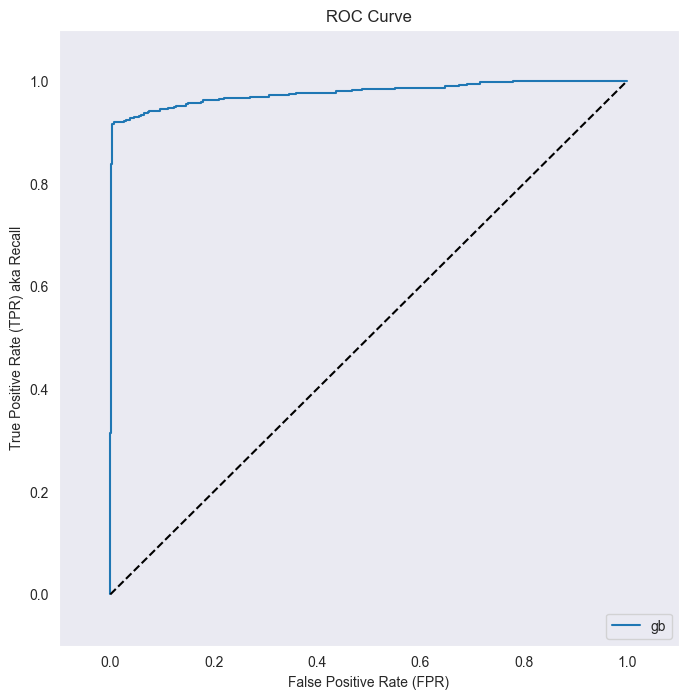

AUROC: 0.9771998422899102


In [145]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

for name, model in filter_model.items():
    print("Results for", name, "\n")

    # Make predictions
    pred = model.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    print(cm)

    # Accuracy Score
    print("Accuracy score:", accuracy_score(y_test, pred))

    # Precision
    precision = cm[1][1] / (cm[0][1] + cm[1][1])
    print("Precision:", precision)

    # Recall
    recall = cm[1][1] / (cm[1][0] + cm[1][1])
    print("Recall:", recall)

    # F1 Score
    print('F1:', f1_score(y_test, pred))

    # ROC Curve
    pred_prob = model.predict_proba(x_test)
    pred_prob = [p[1] for p in pred_prob]

    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    fig = plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=name)
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR) aka Recall')
    plt.legend(loc="lower right")
    plt.show()

    # AUROC Score
    print('AUROC:', roc_auc_score(y_test, pred_prob))


save model as file

In [146]:
with open('model_v1,pkl', 'wb') as f:
    pickle.dump(filter_model['rf'].best_estimator_,f)

In [147]:
df= pd.read_csv('Analytical_table.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


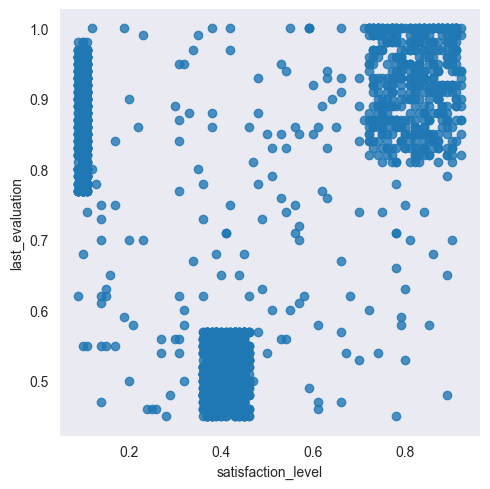

In [191]:
sb.lmplot(x='satisfaction_level', y='last_evaluation', data=df[df.left==1], fit_reg=False)
plt.show()


underperformer: last_evaluation <0.57
unhappy: satification <0.48
overachievers : last_evaluation >0.8 and satification >0.7

In [192]:
# Correcting the conditions and using appropriate threshold values
df['underperformer'] = ((df['last_evaluation'] < 0.57) & (~df['last_evaluation'].isna())).astype(int)
df['unhappy'] = (df['satisfaction_level'] < 0.48).astype(int)
df['overachievers'] = ((df['last_evaluation'] > 0.6) & (df['satisfaction_level'] > 0.7) & (~df['last_evaluation'].isna())).astype(int)


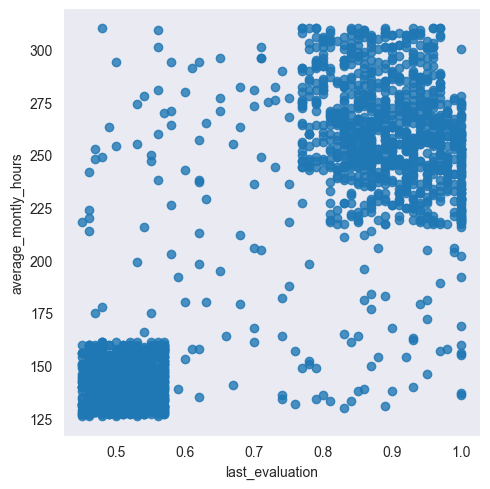

In [193]:
sb.lmplot(x='last_evaluation',
          y='average_montly_hours',
          data=df[df.left==1],
          fit_reg=False)
plt.show()

In [194]:
df['stars']=((df.average_montly_hours > 215) &(df.last_evaluation >0.76)).astype(int)
df['stackers']=((df.average_montly_hours <165) &(df.last_evaluation <0.57).astype(int))

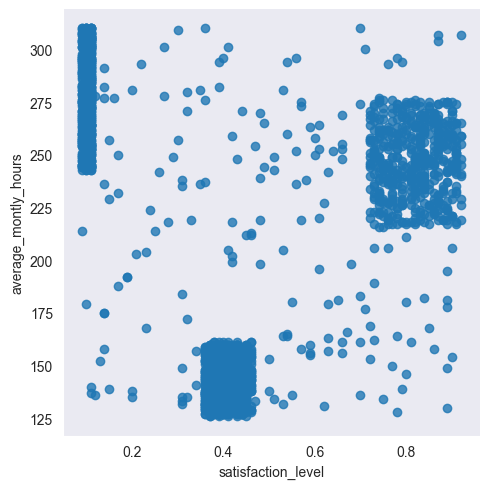

In [195]:
sb.lmplot(x='satisfaction_level',
          y='average_montly_hours',
          data=df[df.left==1],
          fit_reg=False)
plt.show()

In [196]:
df['workaholic']=((df.average_montly_hours > 215) &(df.satisfaction_level >0.75)).astype(int)
df['justajob']=((df.average_montly_hours <160)).astype(int)
df['overworked']=((df.average_montly_hours >243) &(df.satisfaction_level >0.3)).astype(int)


In [199]:
df[['underperformer', 'unhappy','overachievers','stars','stackers','workaholic','justajob','overworked']].mean()

underperformer    0.246435
unhappy           0.240764
overachievers     0.331082
stars             0.225419
stackers          0.119756
workaholic        0.166125
justajob          0.265532
overworked        0.188892
dtype: float64

In [200]:
df.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,underperformer,unhappy,overachievers,stars,stackers,workaholic,justajob,overworked
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,True,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,False,1,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,False,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,False,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,True,0,1,0


In [201]:
df.shape

(11991, 29)

####save our analytical base table

In [202]:
df.to_csv('Analytical_table_v2.csv',index=None)


### Training

In [211]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

# Prepare the data
y = df.left
x = df.drop('left', axis=1)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=492, stratify=df.left)

# Define the pipelines
pipelines = {
    'l1': make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l1', random_state=123, solver='liblinear')
    ),
    'l2': make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l2', random_state=123)
    ),
    'rf': make_pipeline(
        StandardScaler(), 
        RandomForestClassifier(random_state=123)
    ),
    'gb': make_pipeline(
        StandardScaler(),
        GradientBoostingClassifier(random_state=123)
    )
}

# Hyperparameter grids for each model
l1_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

l2_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['sqrt', 'log2', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

gb_hyperparameters = {
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}


# Hyperparameter dictionary
hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

# Dictionary to store the models
filter_model = {}

# Kiểm tra xem có giá trị NaN trong dữ liệu không
print("Checking for NaN values:")
print(df.isna().sum())  # Kiểm tra số lượng giá trị NaN

# Nếu có NaN, bạn có thể xử lý trước khi tiếp tục
# df = df.fillna(0)  # Hoặc sử dụng các phương pháp xử lý NaN khác nếu cần

# Iterate through the pipelines and perform grid search
for name, pipeline in pipelines.items():
    print("Current fitting:", name)

    # Perform GridSearchCV for hyperparameter tuning
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1, error_score='raise')  # Thêm error_score='raise'

    # Fit the model
    model.fit(x_train, y_train)
    
    # Save the model
    filter_model[name] = model
    
    print('Fitting for', name, "completed")


Checking for NaN values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary_high              0
salary_low               0
salary_medium            0
sales_IT                 0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
underperformer           0
unhappy                  0
overachievers            0
stars                    0
stackers                 0
workaholic               0
justajob                 0
overworked               0
dtype: int64
Current fitting: l1
Fitting for l1 completed
Current fitting: l2
Fitting for l2 completed
Current fitting: rf
Fitting for rf completed
Current fitting: gb
Fitting for gb completed

Results for l1 

[[1916   85]
 [ 104  294]]
Accuracy score: 0.921217173822426
Precision: 0.7757255936675461
Recall: 0.7386934673366834
F1: 0.7567567567567568


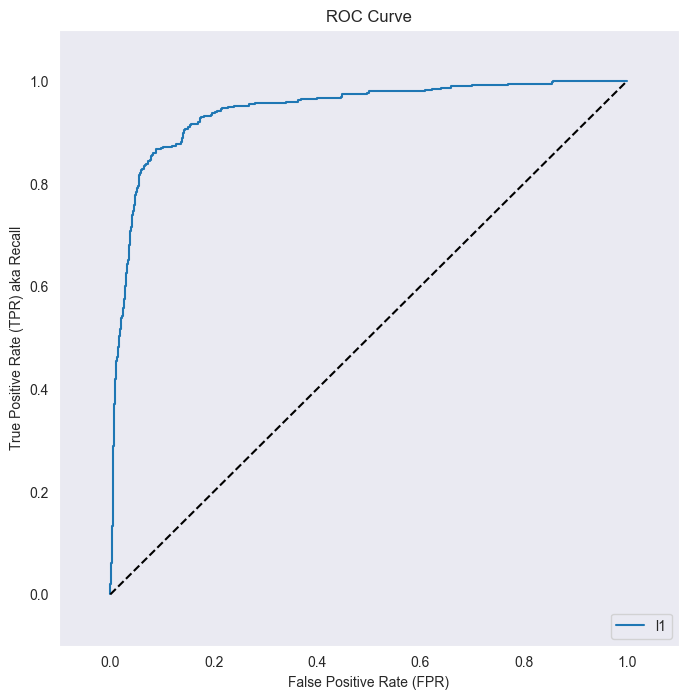

AUROC: 0.9428238142235413
Results for l2 

[[1915   86]
 [ 105  293]]
Accuracy score: 0.9203834931221342
Precision: 0.7730870712401056
Recall: 0.7361809045226131
F1: 0.7541827541827542


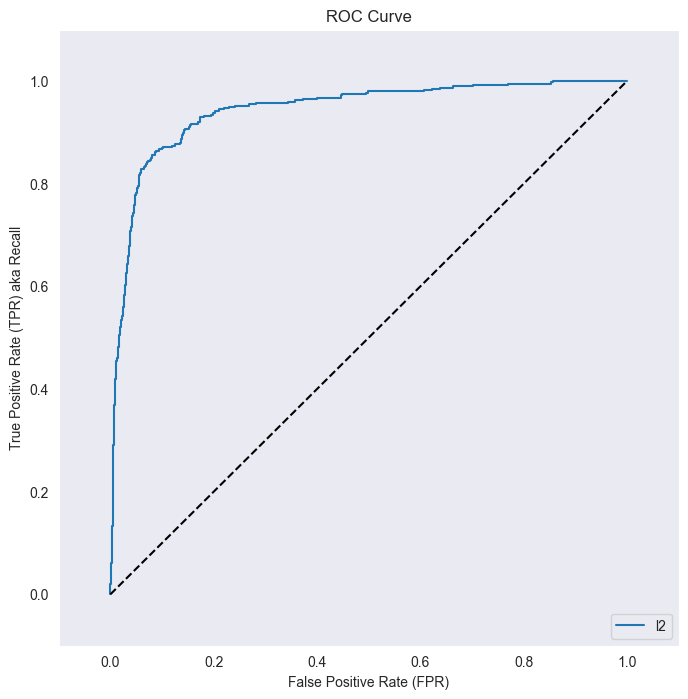

AUROC: 0.9428100020341588
Results for rf 

[[1993    8]
 [  33  365]]
Accuracy score: 0.9829095456440183
Precision: 0.9785522788203753
Recall: 0.9170854271356784
F1: 0.9468223086900129


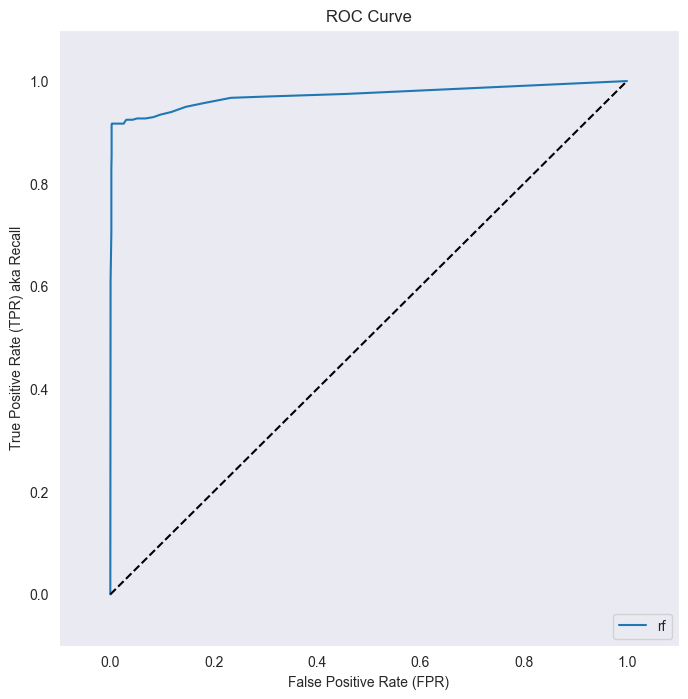

AUROC: 0.9722437776086832
Results for gb 

[[1992    9]
 [  33  365]]
Accuracy score: 0.9824927052938724
Precision: 0.9759358288770054
Recall: 0.9170854271356784
F1: 0.9455958549222798


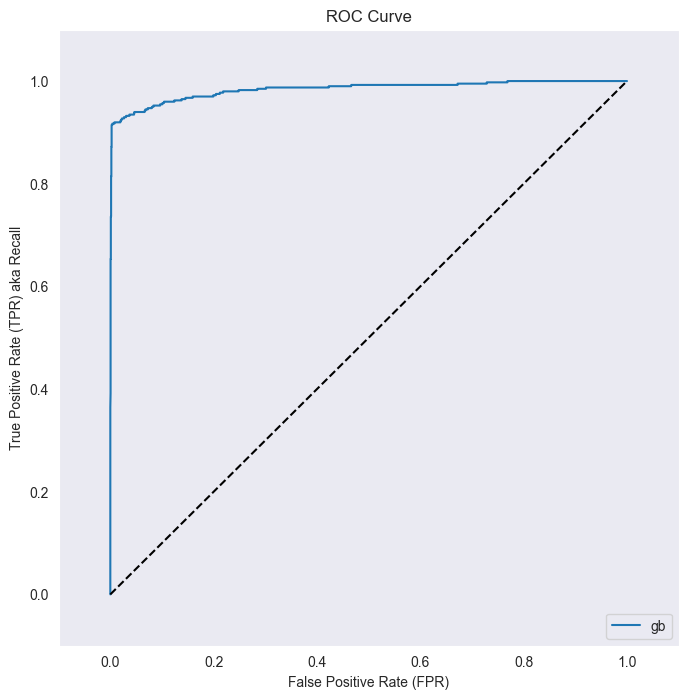

AUROC: 0.9837945348933573


In [213]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

for name, model in filter_model.items():
    print("Results for", name, "\n")

    # Make predictions
    pred = model.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    print(cm)

    # Accuracy Score
    print("Accuracy score:", accuracy_score(y_test, pred))

    # Precision
    precision = cm[1][1] / (cm[0][1] + cm[1][1])
    print("Precision:", precision)

    # Recall
    recall = cm[1][1] / (cm[1][0] + cm[1][1])
    print("Recall:", recall)

    # F1 Score
    print('F1:', f1_score(y_test, pred))

    # ROC Curve
    pred_prob = model.predict_proba(x_test)
    pred_prob = [p[1] for p in pred_prob]

    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    fig = plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=name)
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR) aka Recall')
    plt.legend(loc="lower right")
    plt.show()

    # AUROC Score
    print('AUROC:', roc_auc_score(y_test, pred_prob))


FINAL

In [214]:
print(filter_model['rf'].best_estimator_)
model = RandomForestClassifier(
    max_depth=None,
    max_features=0.33,
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0,
    random_state=123,
    n_estimators=200
)
model.fit(x_train, y_train)
print(model)

pred=model.predict_proba(x_test)
pred= [p[1] for p in pred]
print('AUROC', roc_auc_score(y_test,pred))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.33, random_state=123))])
RandomForestClassifier(max_features=0.33, min_weight_fraction_leaf=0,
                       n_estimators=200, random_state=123)
AUROC 0.9734674120226319
